In [1]:
from sklearn import datasets, model_selection, metrics, tree

import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


#### В этом задании будет использоваться датасет boston из sklearn.datasets. Оставьте последние 25% объектов для контроля качества, разделив X и y на X_train, y_train и X_test, y_test.
Целью задания будет реализовать простой вариант градиентного бустинга над регрессионными деревьями для случая квадратичной функции потерь.

In [2]:
X, y = datasets.load_boston(return_X_y=True)

In [3]:
t = round(X.shape[0] * 0.75)
t

380

In [4]:
X_train, X_test = X[:t], X[t:]
y_train, y_test = y[:t], y[t:]

1. Заведите массив для объектов DecisionTreeRegressor (будем их использовать в качестве базовых алгоритмов) и для вещественных чисел (это будут коэффициенты перед базовыми алгоритмами). В цикле обучите последовательно 50 решающих деревьев с параметрами max_depth=5 и random_state=42 (остальные параметры - по умолчанию). В бустинге зачастую используются сотни и тысячи деревьев, но мы ограничимся 50, чтобы алгоритм работал быстрее, и его было проще отлаживать (т.к. цель задания разобраться, как работает метод). Каждое дерево должно обучаться на одном и том же множестве объектов, но ответы, которые учится прогнозировать дерево, будут меняться в соответствие с полученным в задании 1 правилом. Попробуйте для начала всегда брать коэффициент равным 0.9. Обычно оправдано выбирать коэффициент значительно меньшим - порядка 0.05 или 0.1, но т.к. в нашем учебном примере на стандартном датасете будет всего 50 деревьев, возьмем для начала шаг побольше.

In [5]:
%%time
n_trees = 50

trees = []
gammas = []

def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip
                 (trees, gammas)]) for x in X]

clf = tree.DecisionTreeRegressor(max_depth=5, random_state=42)    
clf.fit(X_train, y_train)

trees.append(clf)
gammas.append(0.9)

RMSE = metrics.mean_squared_error(y_test, gbm_predict(X_test)) ** 0.5
print(f'Initial RMSE Error: {RMSE}')
                                   
for i in range(n_trees - 1):
    s = y_train - gbm_predict(X_train)

    clf = tree.DecisionTreeRegressor(max_depth=5, random_state=42)    
    clf.fit(X_train, s)
                                   
    trees.append(clf)
    gammas.append(0.9)
    
    RMSE = metrics.mean_squared_error(y_test, gbm_predict(X_test)) ** 0.5
    
print(f'Final RMSE Error: {RMSE}')

Initial RMSE Error: 4.674470252481672
Final RMSE Error: 5.4551393760319415
CPU times: user 41.5 s, sys: 41.8 ms, total: 41.5 s
Wall time: 42.1 s


In [6]:
with open('submission_XGBoost_1.txt', 'w') as f:
    f.write(str(RMSE))
    f.close()

2. Вас может также беспокоить, что при движении с постоянным шагом вблизи минимума ошибки ответы на обучающей выборке меняются слишком резко, перескакивая через минимум. Попробуйте уменьшать вес перед каждым алгоритмом с каждой следующей итерацией по формуле 0.9 / (1.0 + i), где i - номер итерации (от 0 до 49). Используйте качество работы алгоритма как ответ в пункте 3. В реальности часто применяется следующая стратегия выбора шага: как только выбран алгоритм, подберем коэффициент перед ним численным методом оптимизации таким образом, чтобы отклонение от правильных ответов было минимальным. Мы не будем предлагать вам реализовать это для выполнения задания, но рекомендуем попробовать разобраться с такой стратегией и реализовать ее при случае для себя.

In [7]:
%%time
n_trees = 50

trees = []
gammas = []

def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip
                 (trees, gammas)]) for x in X]

clf = tree.DecisionTreeRegressor(max_depth=5, random_state=42)    
clf.fit(X_train, y_train)

trees.append(clf)
gammas.append(0.9)

RMSE = metrics.mean_squared_error(y_test, gbm_predict(X_test)) ** 0.5
print(f'Initial RMSE Error: {RMSE}')
                                   
for i in range(n_trees - 1):
    s = y_train - gbm_predict(X_train)

    clf = tree.DecisionTreeRegressor(max_depth=5, random_state=42)    
    clf.fit(X_train, s)
                                   
    trees.append(clf)
    gammas.append(0.9 / (1.0 + i))
    
    RMSE = metrics.mean_squared_error(y_test, gbm_predict(X_test)) ** 0.5
    
print(f'Final RMSE Error: {RMSE}')

Initial RMSE Error: 4.674470252481672
Final RMSE Error: 5.167014791810496
CPU times: user 36.2 s, sys: 40.3 ms, total: 36.2 s
Wall time: 36.3 s


Обратите внимание, что более аккуратный выбор шага позволил понизить RMSE на тестовой выборке (если нет - попробуйте перезапустить алгоритм несколько раз - в среднем качество должно было улучшиться). Однако не стоит относиться к этому результату слишком доверчиво - небольшие изменения в формуле вычисления величины шага могут легко "сломать" этот эффект. Выбор хорошего шага в градиентном спуске всегда достаточно непростой вопрос - остается только порадоваться, что почти всегда можно использовать готовые реализации из библиотек.

In [8]:
with open('submission_XGBoost_2.txt', 'w') as f:
    f.write(str(RMSE))
    f.close()

3. Реализованный вами метод - градиентный бустинг над деревьями - очень популярен в машинном обучении. Он представлен как в самой библиотеке sklearn, так и в сторонней библиотеке XGBoost, которая имеет свой питоновский интерфейс. На практике XGBoost работает заметно лучше GradientBoostingRegressor из sklearn, но для этого задания вы можете использовать любую реализацию. Исследуйте, переобучается ли градиентный бустинг с ростом числа итераций (и подумайте, почему), а также с ростом глубины деревьев. На основе наблюдений выпишите через пробел номера правильных из приведенных ниже утверждений в порядке возрастания номера (это будет ответ в п.4):

1) С увеличением числа деревьев, начиная с некоторого момента, качество работы градиентного бустинга не меняется существенно.

2) С увеличением числа деревьев, начиная с некоторого момента, градиентный бустинг начинает переобучаться.

3) С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга на тестовой выборке начинает ухудшаться

4) С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга перестает существенно изменяться

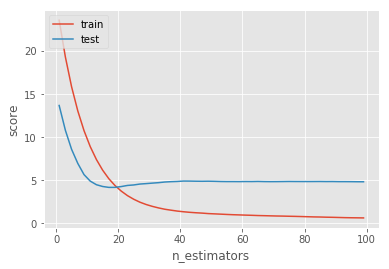

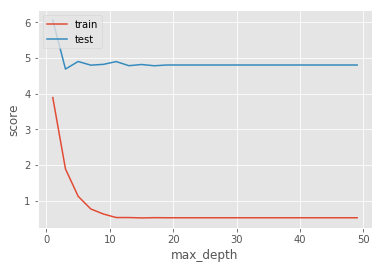

CPU times: user 7.6 s, sys: 359 ms, total: 7.96 s
Wall time: 2.08 s


In [9]:
%%time

n_trees = range(1, 100, 2)
max_depth = range(1, 50, 2)

xgb_scores_test = []
xgb_scores_train = []

for n in n_trees:
    clf = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=n, min_child_weight=3)
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    predict_train = clf.predict(X_train)
    RMSE_test = metrics.mean_squared_error(y_test, predict) ** 0.5
    RMSE_train = metrics.mean_squared_error(y_train, predict_train) ** 0.5

    xgb_scores_test.append(RMSE_test)
    xgb_scores_train.append(RMSE_train)
    
plt.plot(n_trees, xgb_scores_train, label='train')
plt.plot(n_trees, xgb_scores_test, label='test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend(loc='upper left')
plt.show()

xgb_scores_depth_test = []
xgb_scores_depth_train = []

for depth in max_depth:
    clf = xgb.XGBRegressor(learning_rate=0.1, max_depth=depth, n_estimators=50, min_child_weight=3)
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    predict_train = clf.predict(X_train)
    RMSE_test = metrics.mean_squared_error(y_test, predict) ** 0.5
    RMSE_train = metrics.mean_squared_error(y_train, predict_train) ** 0.5

    xgb_scores_depth_test.append(RMSE_test)
    xgb_scores_depth_train.append(RMSE_train)
    
plt.plot(max_depth, xgb_scores_depth_train, label='train')
plt.plot(max_depth, xgb_scores_depth_test, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend(loc='upper left')
plt.show()

В самом деле, градиентный бустинг все больше подгоняется под данные с ростом числа деревьев, а рост глубины деревьев только ускоряет этот процесс. Начиная с некоторого момента алгоритм будет все больше переобучаться.

In [10]:
with open('submission_XGBoost_3.txt', 'w') as f:
    f.write('2 3')
    f.close()

4. Сравните получаемое с помощью градиентного бустинга качество с качеством работы линейной регрессии. Для этого обучите LinearRegression из sklearn.linear_model (с параметрами по умолчанию) на обучающей выборке и оцените для прогнозов полученного алгоритма на тестовой выборке RMSE. Полученное качество - ответ в пункте 5. В данном примере качество работы простой модели должно было оказаться хуже, но не стоит забывать, что так бывает не всегда. В заданиях к этому курсу вы еще встретите пример обратной ситуации.

In [11]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

predict = clf.predict(X_test)

RMSE = metrics.mean_squared_error(y_test, predict) ** 0.5

print(f'Linear Regression RMSE Error: {RMSE}')
print(f'XGBoost RMSE Error: {5.167014791810495}')

with open('submission_XGBoost_4.txt', 'w') as f:
    f.write(str(RMSE))
    f.close()

Linear Regression RMSE Error: 7.819688142087423
XGBoost RMSE Error: 5.167014791810495


Качество работы простого метода (линейной регрессии) оказалось хуже. Этот результат в некоторой степени завораживает: всего 1 деревьев, каждое из которых в каждом своем листе оценивает целевую зависимость некоторой константой, уже решили задачу регрессии лучше, чем линейная модель.